In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from collections import defaultdict

# Fetching data from API endpoints
quiz_endpoint = "https://www.jsonkeeper.com/b/LLQT"
quiz_submission_endpoint = "https://api.jsonserve.com/rJvd7g"
historical_quiz_endpoint = "https://api.jsonserve.com/XgAgFJ"

In [2]:
# Function to get quiz data
def fetch_quiz_data(endpoint):
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch quiz data")
        return None

# Function to get quiz submission data
def fetch_submission_data(endpoint):
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch quiz submission data")
        return None

# Function to get historical quiz data
def fetch_historical_data(endpoint):
    response = requests.get(endpoint)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch historical quiz data")
        return None

In [3]:
# Fetch current quiz, submission, and historical data
quiz_data = fetch_quiz_data(quiz_endpoint)
submission_data = fetch_submission_data(quiz_submission_endpoint)
historical_data = fetch_historical_data(historical_quiz_endpoint)

In [4]:
# Analyzing the quiz data
def analyze_quiz_data(quiz_data):
    # Extracting important fields from quiz data
    quiz_details = {
        "quiz_id": quiz_data.get("id"),
        "title": quiz_data.get("title"),
        "duration": quiz_data.get("duration"),
        "questions_count": quiz_data.get("questions_count"),
        "negative_marks": quiz_data.get("negative_marks"),
        "correct_answer_marks": quiz_data.get("correct_answer_marks"),
        "end_time": quiz_data.get("end_time"),
    }
    
    # Getting question-level insights
    questions = quiz_data.get("questions", [])
    question_topics = defaultdict(int)
    for question in questions:
        topic = question.get("topic")
        if topic:
            question_topics[topic] += 1
            
    return quiz_details, question_topics

# Analyzing the submission data
def analyze_submission_data(submission_data):
    score = submission_data.get("score")
    accuracy = submission_data.get("accuracy")
    correct_answers = submission_data.get("correct_answers")
    incorrect_answers = submission_data.get("incorrect_answers")
    
    performance_insights = {
        "score": score,
        "accuracy": accuracy,
        "correct_answers": correct_answers,
        "incorrect_answers": incorrect_answers,
        "response_map": submission_data.get("response_map"),
    }
    
    return performance_insights

In [5]:
# Analyzing historical quiz performance
def analyze_historical_data(historical_data):
    # Extracting performance data for the last 5 quizzes
    historical_scores = [entry.get("score") for entry in historical_data]
    historical_accuracies = [entry.get("accuracy") for entry in historical_data]
    
    return historical_scores, historical_accuracies

In [6]:
# Generate recommendations based on performance
def generate_recommendations(performance_insights, question_topics, historical_scores):
    weak_areas = []
    for topic, count in question_topics.items():
        if count < 5:  # If a topic has fewer questions in the quiz
            weak_areas.append(f"Focus more on {topic}")
    
    # Based on performance score, recommend focus on areas with lower performance
    score_trend = np.mean(historical_scores)
    if performance_insights["score"] < score_trend:
        weak_areas.append("Consider revising topics where you're scoring lower.")
    
    # Suggest focus areas based on weak performance
    recommendations = {
        "suggested_topics": weak_areas,
        "improvement_steps": ["Revise previous quizzes", "Focus on weak areas", "Practice more difficult questions"],
    }
    
    return recommendations

In [7]:
# Probabilistic Model for NEET rank prediction
def predict_neet_rank(historical_scores, quiz_scores):
    # Ensure both historical_scores and quiz_scores have the same length
    if len(historical_scores) != len(quiz_scores):
        print("Mismatch in the number of historical scores and quiz scores.")
        return None
    
    X = np.array(historical_scores).reshape(-1, 1)  # Historical scores as features
    y = np.array(quiz_scores)  # Corresponding quiz scores as target
    
    # Train a simple linear regression model to predict rank
    model = LinearRegression()
    model.fit(X, y)
    
    predicted_rank = model.predict([[quiz_scores[-1]]])  # Predict rank based on the last quiz score
    return predicted_rank

In [8]:
# Visualize student performance trends
def visualize_performance(historical_scores, historical_accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(historical_scores, label="Scores", marker='o')
    plt.plot(historical_accuracies, label="Accuracy", marker='x')
    plt.title("Student Performance Over Last Quizzes")
    plt.xlabel("Quiz Number")
    plt.ylabel("Performance")
    plt.legend()
    plt.show()

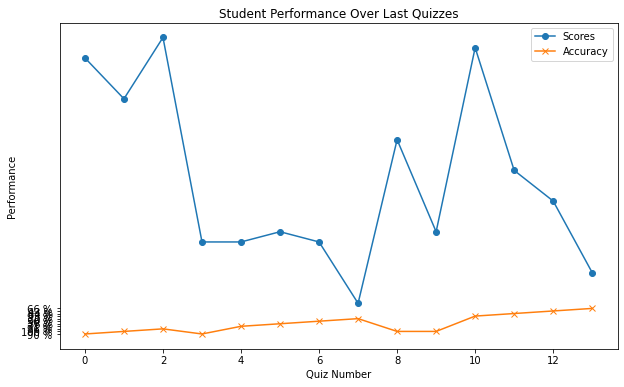

In [9]:
# Process the fetched data and generate output
quiz_details, question_topics = analyze_quiz_data(quiz_data)
performance_insights = analyze_submission_data(submission_data)
historical_scores, historical_accuracies = analyze_historical_data(historical_data)

# Generate recommendations
recommendations = generate_recommendations(performance_insights, question_topics, historical_scores)

# Predict NEET rank
predicted_rank = predict_neet_rank(historical_scores, [performance_insights["score"] for _ in historical_scores])

# Visualize performance
visualize_performance(historical_scores, historical_accuracies)


In [10]:
# Output the results
print(f"Recommendations: {recommendations}")
print(f"Predicted NEET Rank: {predicted_rank[0] if predicted_rank is not None else 'Unable to predict rank'}")

Recommendations: {'suggested_topics': ["Consider revising topics where you're scoring lower."], 'improvement_steps': ['Revise previous quizzes', 'Focus on weak areas', 'Practice more difficult questions']}
Predicted NEET Rank: 32.0
